## Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing Data File 

In [3]:
food_data = pd.read_csv('foodstruct_nutritional_facts.csv') 
food_data.head() 

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,3.0,...,0.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,9.0,...,0.0,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,10.0,...,0.0,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,81.0,...,0.0,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN


## EDA Part I: Cleaning Data 

In [4]:
# Checking all column names 
food_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Food Name                             1171 non-null   object 
 1   Category Name                         1171 non-null   object 
 2   Calcium                               1146 non-null   float64
 3   Calories                              1171 non-null   float64
 4   Carbs                                 1171 non-null   float64
 5   Cholesterol                           1116 non-null   float64
 6   Copper                                1092 non-null   float64
 7   Fats                                  1171 non-null   float64
 8   Fiber                                 1073 non-null   float64
 9   Folate                                1069 non-null   float64
 10  Iron                                  1151 non-null   float64
 11  Magnesium        

In [5]:
# Checking how many unique food groups fall under the categories column 
food_groups_counts = food_data['Category Name'].value_counts()
food_groups_counts

Category Name
Baked Products                     106
Meat                               100
Sweets                              96
Meals, Entrees, and Side Dishes     90
Vegetables                          90
Fruits                              88
Beverages                           84
Seafood                             83
Soups                               67
Grains                              66
Greens                              60
Dairy                               58
Oils and Sauces                     54
Spices                              46
Fast Foods                          45
Nuts                                27
Mushrooms                            8
Baby Foods                           3
Name: count, dtype: int64

According to the National Institute of Health (NIH) there are 8 major food groups... 
 - Vegetables
 - Fruits
 - Grains
 - Protein Foods 
 - Dairy 
 - Oils and Solid Fats
 - Added Sugars
 - Beverages 

The food_data Categories are not sorted this way so we need to reorganize how things are classified to align them with the NIH food groups. Below is an outline of how the Categories above will be adjusted to suit the NIH classifications. 

| NIH Food Group       | Data Categories                |
|----------------------|---------------------------------|
| Vegetables           | Vegetables, Greens, Mushrooms   |
| Fruits               | Fruits                          |
| Grains               | Grains                          |
| Protein Foods        | Meat, Seafood, Nuts             |
| Dairy                | Dairy                           |
| Oils and Solid Fats  | Oils and Sauces                 |
| Added Sugars         | Baked Products, Sweets          |
| Beverages            | Beverages                       |


Categories that are being filtered out: Baby Foods, Fast Foods, Spices, Soups, Meals, Entrees, and Side Dishes

[Source](https://www.nia.nih.gov/health/healthy-eating-nutrition-and-diet/healthy-eating-you-age-know-your-food-groups#grains)

In [6]:
# Clean and standardize the 'Category Name' column
food_data['Category Name'] = food_data['Category Name'].str.strip().str.title()

# Define the mapping from old categories to NIH Food Groups
category_mapping = {
    'Vegetables': 'Vegetables',
    'Greens': 'Vegetables',
    'Mushrooms': 'Vegetables',
    'Fruits': 'Fruits',
    'Grains': 'Grains',
    'Meat': 'Protein Foods',
    'Seafood': 'Protein Foods',
    'Nuts': 'Protein Foods',
    'Dairy': 'Dairy',
    'Oils': 'Oils and Solid Fats',
    'Sauces': 'Oils and Solid Fats',
    'Baked Products': 'Added Sugars',
    'Sweets': 'Added Sugars',
    'Beverages': 'Beverages'}


# Map the old categories to the new NIH Food Groups
food_data['NIH_Food_Group'] = food_data['Category Name'].map(category_mapping)

# Identify and handle unmapped categories
unmapped = food_data[food_data['NIH_Food_Group'].isnull()]['Category Name'].unique()
if len(unmapped) > 0:
    print('Categories not mapped:')
    print(unmapped)
    # Decide how to handle these categories
    # For example, assign to 'Other'
    food_data['NIH_Food_Group'] = food_data['NIH_Food_Group'].fillna('Other')

# Verify the mapping
print('Mapped NIH Food Groups:')
print(food_data['NIH_Food_Group'].value_counts())

# Save the updated dataset
food_data.to_csv('food_data_nih.csv', index=False)

Categories not mapped:
['Spices' 'Oils And Sauces' 'Soups' 'Fast Foods'
 'Meals, Entrees, And Side Dishes' 'Baby Foods']
Mapped NIH Food Groups:
NIH_Food_Group
Other            305
Protein Foods    210
Added Sugars     202
Vegetables       158
Fruits            88
Beverages         84
Grains            66
Dairy             58
Name: count, dtype: int64


In [7]:
nih_food_data = pd.read_csv('food_data_nih.csv')
nih_food_data.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid,NIH_Food_Group
0,Acerola,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
1,Apple,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,3.0,...,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
2,Apricot,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,9.0,...,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
3,Dried fruit,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,10.0,...,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
4,Avocado,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,81.0,...,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN,Fruits


In [8]:
# We are going to move the NIH Food Groups column to the 2nd position to the left
# Get the list of columns
columns = nih_food_data.columns.tolist()

# Remove 'NIH_Food_Group' from its current position
columns.remove('NIH_Food_Group')

# Insert 'NIH_Food_Group' at position 1 (after the first column)
columns.insert(1, 'NIH_Food_Group')

# Reorder the DataFrame
nih_food_data = nih_food_data[columns]
nih_food_data.head()

,Food Name,NIH_Food_Group,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,...,0.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,...,0.0,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,...,0.0,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,...,0.0,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN


## EDA Part II: Selecting & Visualizing Nutrients 

Each food group has some predominant nutrient characteristics. Although these may not be unique, we want to select nutrients that are characteristic of some food groups and are not of others. Below are each of the food groups and some of their defining nutrients. 

| NIH Food Group       | Defining Nutrients               |
|----------------------|---------------------------------|
| Vegetables           | Vitamins, Minerals, Carbohydrates, Fibre |
| Fruits               | Vitamins, Minerals, Carbohydrates, Fibre |
| Grains               | Carbohydrates, Fibre, B Vitamins         |
| Protein Foods        | Proteins             |
| Dairy                | Calcium, Potassium, Vitamin D,           |
| Oils and Solid Fats  | High Calories, Vitamin E, Fats                 |
| Added Sugars         | Sugar         |
| Beverages            | Low Fat                       |

Given each food group has several different characteristics we will go with the nutrients that must be legally put on nutrition labels in Canada. Hence the following... 
- Calories
- Total Fat
- Saturated Fat
- Trans Fat
- Cholesterol
- Sodium
- Total Carbohydrates
- Dietary Fibre
- Sugar
- Protein
- Calcium
- Potassium
- Iron 

In [9]:
nutrients = ['Calories', 'Fats', 'Saturated Fat', 'Trans Fat', 'Cholesterol',  
                        'Sodium', 'Carbs', 'Fiber', 'Sugar', 'Protein', 
                        'Calcium', 'Potassium', 'Iron'
                        ]

nih_food_data[nutrients].head() 

,Calories,Fats,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugar,Protein,Calcium,Potassium,Iron
0,32.0,3.0,7.0,0.0,0.0,7.0,77.0,11.0,NaN,4.0,12.0,146.0,2.0
1,52.0,17.0,3.0,0.0,0.0,1.0,14.0,24.0,10.0,26.0,6.0,107.0,12.0
2,48.0,39.0,3.0,0.0,0.0,1.0,11.0,2.0,92.0,14.0,13.0,259.0,39.0
3,241.0,51.0,2.0,NaN,0.0,10.0,63.0,73.0,53.0,34.0,55.0,1162.0,27.0
4,160.0,15.0,21.0,0.0,0.0,7.0,85.0,67.0,66.0,2.0,12.0,485.0,55.0


In [10]:
# The nutrients are supposed to be our Explanatory Variable which we will define as X
X = nih_food_data[nutrients]

# The food groups are supposed to be our Response Variable which we will define as Y
y = nih_food_data['NIH_Food_Group']

In [11]:
print(X.describe())

          Calories         Fats  Saturated Fat   Trans Fat  Cholesterol   
count  1171.000000  1171.000000    1091.000000  630.000000  1116.000000  \
mean    224.772844    28.842015      25.215399    4.728571    30.883513   
std     185.963326    26.333005      26.166587   13.205637    85.313975   
min       0.000000     0.000000       0.000000    0.000000     0.000000   
25%      72.000000    11.000000       4.000000    0.000000     0.000000   
50%     182.000000    21.000000      17.000000    0.000000     0.000000   
75%     342.500000    42.000000      36.000000    2.000000    33.250000   
max     902.000000   100.000000     153.000000   99.000000  1085.000000   

             Sodium        Carbs        Fiber       Sugar      Protein   
count   1150.000000  1171.000000  1073.000000  871.000000  1171.000000  \
mean     352.151304    38.228864    16.265610   31.506315    30.093083   
std     1474.430022    28.801244    21.069034   27.877064    25.919119   
min        0.000000     0.00

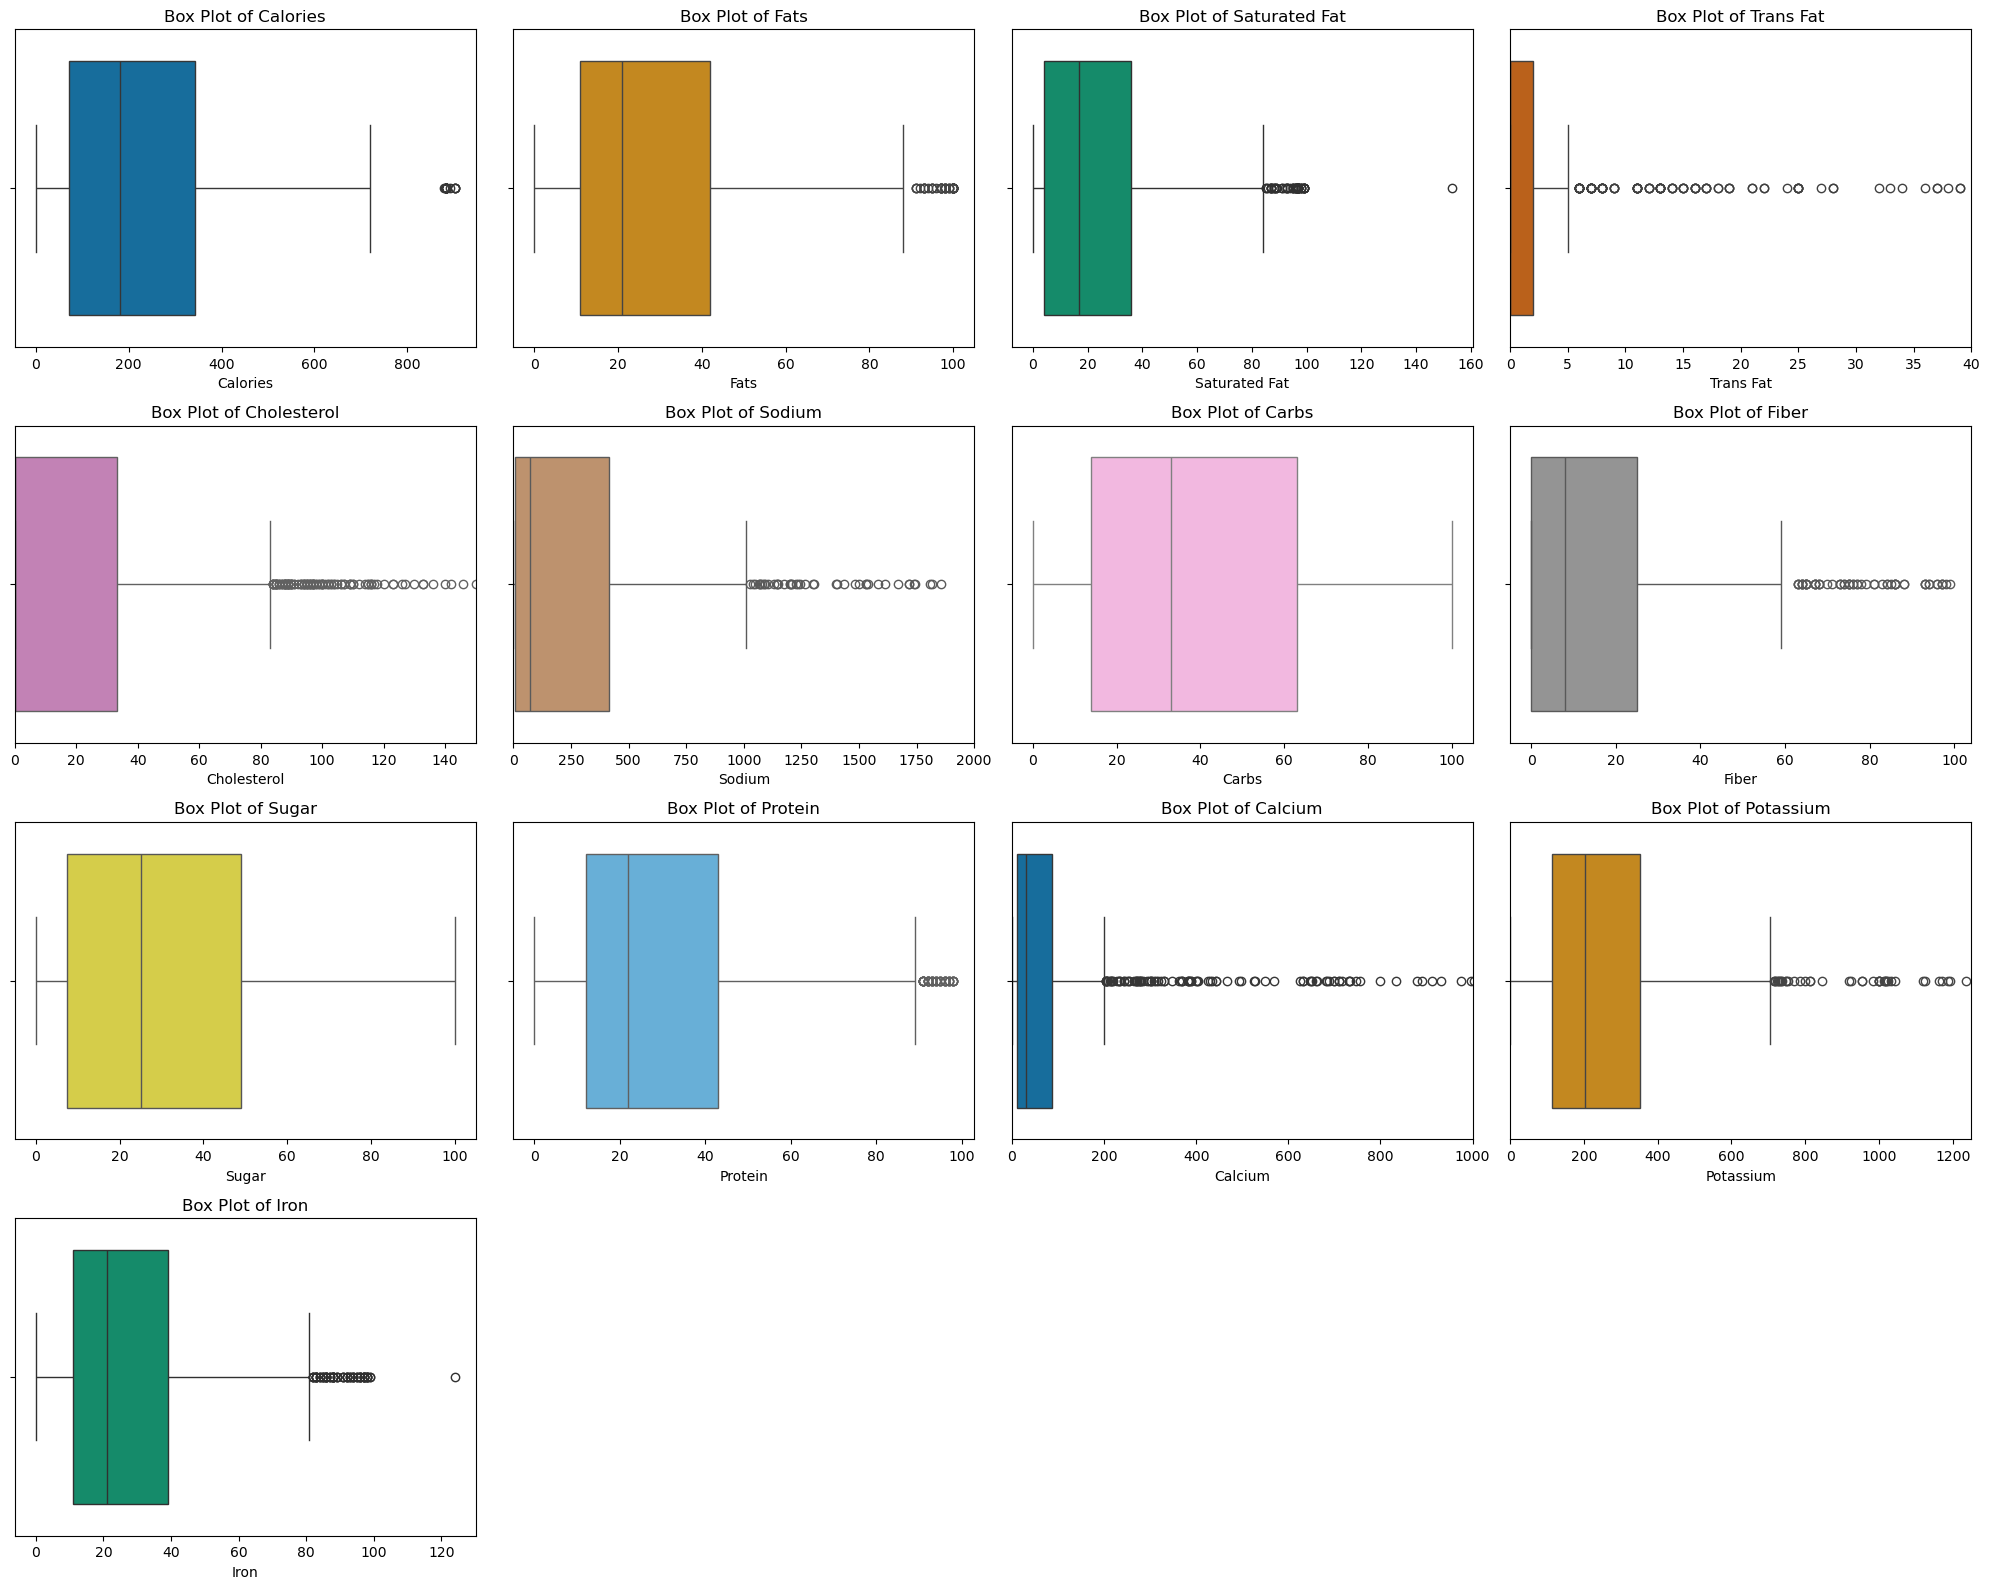

In [12]:
# Box plots demonstrating distributions for each nutrient 

# Create subplots with 4 rows and 4 columns 
fig, axes = plt.subplots(4, 4, figsize = (20, 16))  # Adjust the figsize as needed

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Different colours for each boxplot
palette = sns.color_palette('colorblind', len(nutrients)) 

# y-axis limits for certain nutrients
y_axis_limits = {
    'Cholesterol': (0, 250),
    'Sodium': (0, 2000),
    'Potassium': (0, 1000),
    'Calcium': (0, 1250)
}

# y-axis limits for certain nutrients
x_axis_limits = {
    'Cholesterol': (0, 150),
    'Sodium': (0, 2000),
    'Potassium': (0, 1250),
    'Calcium': (0, 1000), 
    'Trans Fat': (0, 40)
}

# Loop through each feature and create a boxplot in the corresponding subplot
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x = X[nutrient], ax = axes[i], color = palette[i])
    axes[i].set_title(f'Box Plot of {nutrient}')
    axes[i].set_xlabel(nutrient)

    if nutrient in x_axis_limits:
        axes[i].set_xlim(x_axis_limits[nutrient]) 
        
# Remove any unused subplots if there are fewer than 12 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

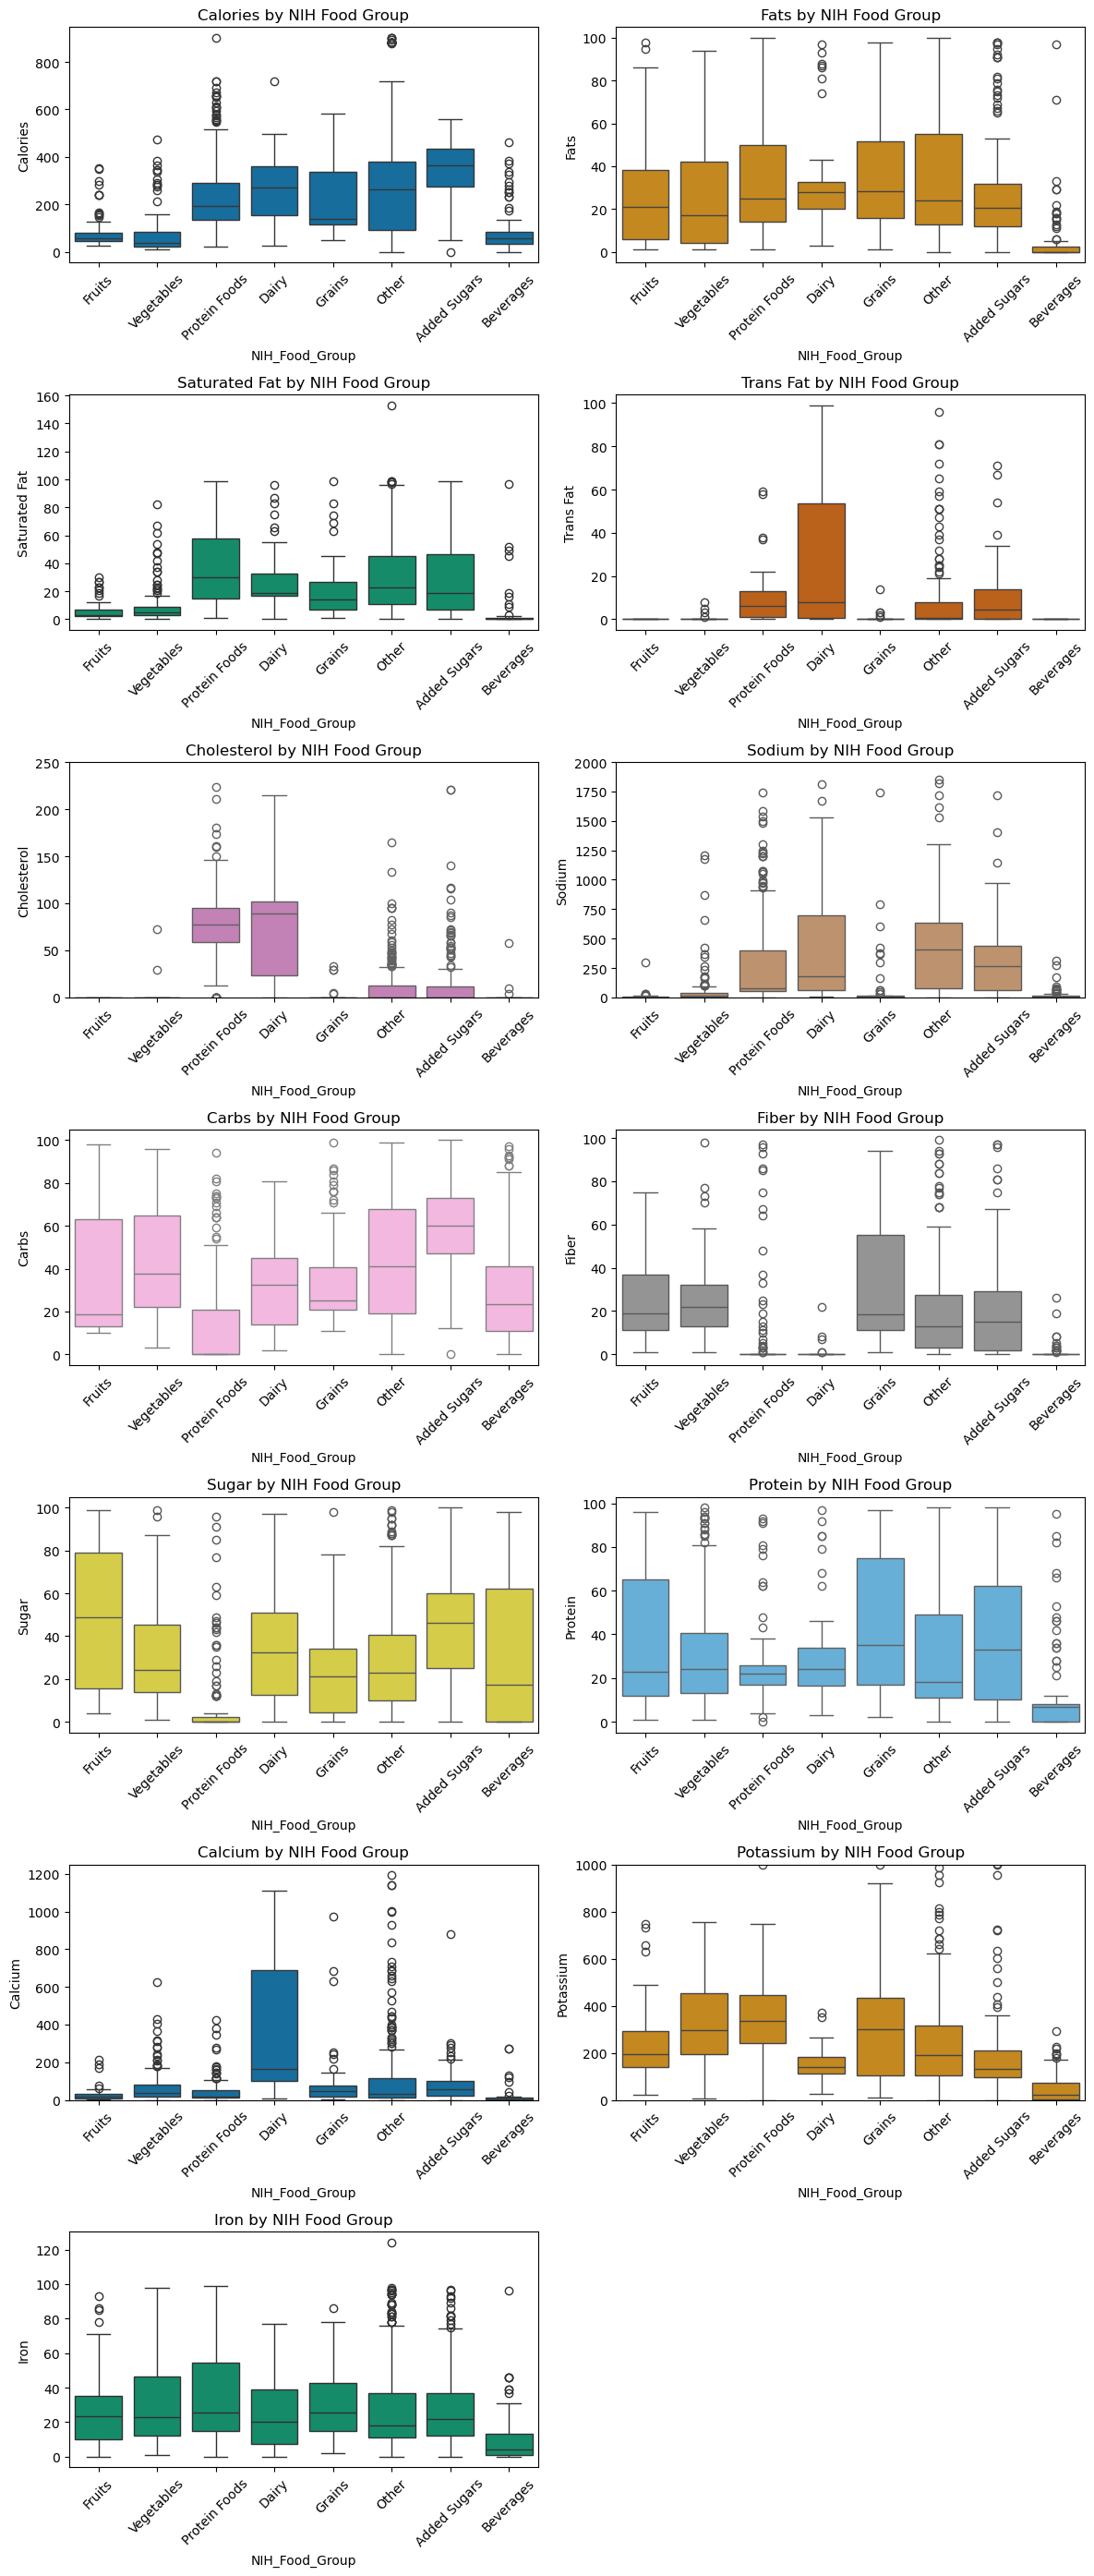

In [13]:
# Box plots demonstrating distributions for each nutrient for every food group 

# Create subplots with 2 rows and 7 columns
fig, axes = plt.subplots(7, 2, figsize = (12, 28))  # Adjust figsize as necessary

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Different colours for each boxplot
palette = sns.color_palette('colorblind', len(nutrients))

# y-axis limits for certain nutrients
y_axis_limits = {
    'Cholesterol': (0, 250),
    'Sodium': (0, 2000),
    'Potassium': (0, 1000),
    'Calcium': (0, 1250)
}

# Loop through each nutrient and create a boxplot in the corresponding subplot
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x = 'NIH_Food_Group', y = nutrient, data = nih_food_data, color = palette[i], ax = axes[i])
    axes[i].set_title(f'{nutrient} by NIH Food Group')
    axes[i].set_ylabel(nutrient)
    axes[i].tick_params(axis='x', rotation=45)
    
    if nutrient in y_axis_limits:
        axes[i].set_ylim(y_axis_limits[nutrient])

# Remove any extra subplots if there are fewer than 14 nutrients
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [20]:
# Replace NaN values with the column mean for each nutrient
for nutrient in nutrients:
    nih_food_data[nutrient].fillna(nih_food_data[nutrient].mean(), inplace=True)

In [14]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H test
kruskal_result = kruskal(nih_food_data[nih_food_data['NIH_Food_Group'] == 'Fruits']['Calories'],
                         nih_food_data[nih_food_data['NIH_Food_Group'] == 'Vegetables']['Fats'],
                         nih_food_data[nih_food_data['NIH_Food_Group'] == 'Protein Foods']['Iron'])

# Print the results
print(f'Kruskal-Wallis Test Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')

from scipy.stats import levene

# Perform Levene's test to compare variances of 'Calories' across different food groups
levene_stat, p_value = levene(
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Fruits']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Vegatables']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Protein Foods']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Dairy']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Grains']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Other']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Added Sugars']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Beverages']['Calories'],
)

# Print the test statistic and p-value
print(f"Levene's Test Statistic: {levene_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The variances between groups are significantly different.")
else:
    print("The variances between groups are not significantly different.")


Kruskal-Wallis Test Statistic: 99.13666890624802, p-value: 2.9699276514744526e-22
Levene's Test Statistic: nan, p-value: nan
The variances between groups are not significantly different.


/Users/armanhundal/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/armanhundal/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
 Added Sugars     Beverages  -262.642    0.0 -324.7721  -200.512   True
 Added Sugars         Dairy  -89.9158 0.0034 -161.2062  -18.6255   True
 Added Sugars        Fruits -269.6318    0.0 -330.7563 -208.5072   True
 Added Sugars        Grains -142.4007    0.0 -210.2513  -74.5501   True
 Added Sugars         Other  -68.0437 0.0001 -111.4559  -24.6315   True
 Added Sugars Protein Foods -105.7825    0.0  -152.945    -58.62   True
 Added Sugars    Vegetables   -280.65    0.0 -331.4754 -229.8246   True
    Beverages         Dairy  172.7262    0.0   91.0258  254.4266   True
    Beverages        Fruits   -6.9897    1.0  -79.9887   66.0093  False
    Beverages        Grains  120.2413 0.0001   41.5245  198.9582   True
    Beverages         Other  194.5983    0.0    135.63  253.5667

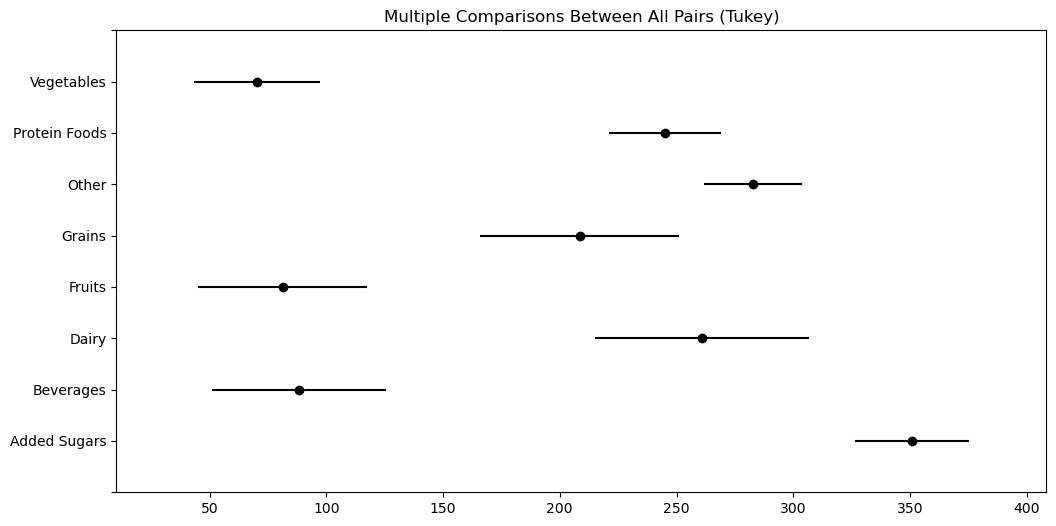

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
 Added Sugars     Beverages -19.7229    0.0 -29.6548  -9.791   True
 Added Sugars         Dairy   7.1125 0.5546  -4.2837 18.5087  False
 Added Sugars        Fruits   0.1321    1.0  -9.6391  9.9033  False
 Added Sugars        Grains   9.2457 0.1611  -1.6006 20.0921  False
 Added Sugars         Other  10.5022 0.0001   3.5625 17.4419   True
 Added Sugars Protein Foods   8.1795 0.0226   0.6403 15.7187   True
 Added Sugars    Vegetables   0.0582    1.0  -8.0666  8.1829  False
    Beverages         Dairy  26.8354    0.0   13.775 39.8957   True
    Beverages        Fruits   19.855    0.0   8.1856 31.5244   True
    Beverages        Grains  28.9686    0.0  16.3852  41.552   True
    Beverages         Other  30.2251    0.0  20.7986 39.6516   True
    Beverages Protein Foods  27.9024    0.0  18.

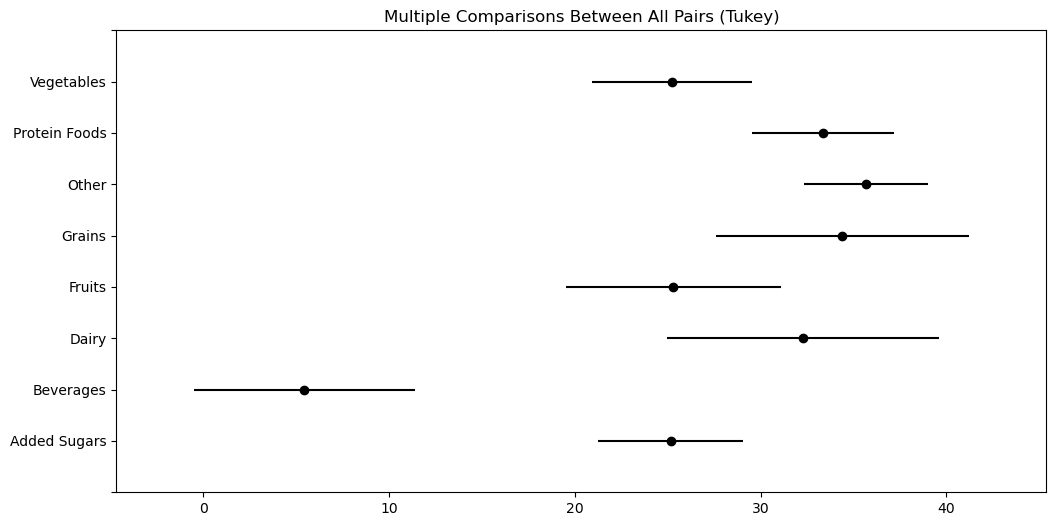

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Added Sugars     Beverages -19.0552    0.0 -28.2883  -9.8221   True
 Added Sugars         Dairy  -0.8106    1.0  -11.405   9.7838  False
 Added Sugars        Fruits -18.2716    0.0 -27.3554  -9.1879   True
 Added Sugars        Grains  -8.6177 0.1586 -18.7009   1.4656  False
 Added Sugars         Other   1.3861 0.9981  -5.0654   7.8376  False
 Added Sugars Protein Foods   7.6152 0.0223   0.6064   14.624   True
 Added Sugars    Vegetables -17.5381    0.0 -25.0912  -9.9849   True
    Beverages         Dairy  18.2446 0.0002   6.1031  30.3861   True
    Beverages        Fruits   0.7835    1.0 -10.0648  11.6319  False
    Beverages        Grains  10.4375 0.1207  -1.2606  22.1356  False
    Beverages         Other  20.4413    0.0   11.678  29.2046   True
    Beverages Protein Foods  26.67

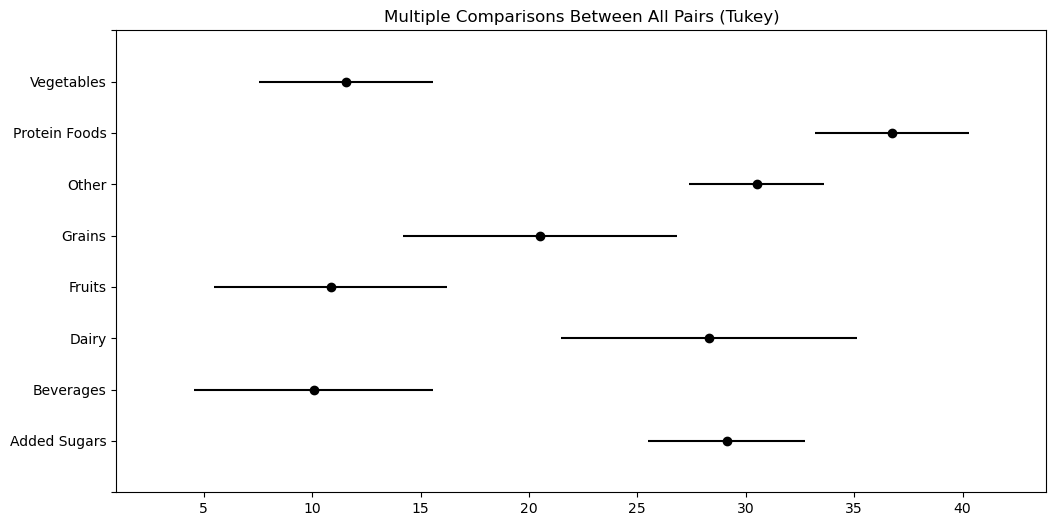

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
 Added Sugars     Beverages  -5.9468    0.0  -9.5983 -2.2954   True
 Added Sugars         Dairy   2.7049 0.5095  -1.4849  6.8947  False
 Added Sugars        Fruits  -6.2488    0.0  -9.8411 -2.6564   True
 Added Sugars        Grains  -4.6823  0.009    -8.67 -0.6947   True
 Added Sugars         Other   0.2063    1.0  -2.3451  2.7577  False
 Added Sugars Protein Foods  -0.8456 0.9835  -3.6174  1.9262  False
 Added Sugars    Vegetables  -6.1221    0.0  -9.1092 -3.1351   True
    Beverages         Dairy   8.6517    0.0   3.8501 13.4533   True
    Beverages        Fruits  -0.3019    1.0  -4.5922  3.9883  False
    Beverages        Grains   1.2645 0.9914  -3.3617  5.8908  False
    Beverages         Other   6.1531    0.0   2.6875  9.6187   True
    Beverages Protein Foods   5.1013 0.0006   1.

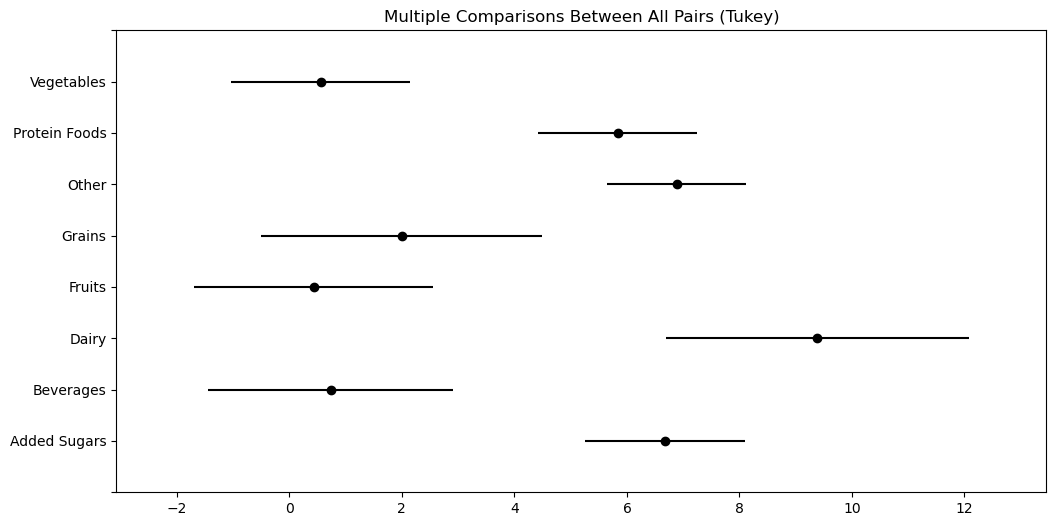

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
 Added Sugars     Beverages   -6.9711 0.9961  -35.9186   21.9765  False
 Added Sugars         Dairy  133.3703    0.0  100.1548  166.5858   True
 Added Sugars        Fruits   -11.321   0.93  -39.8001   17.1581  False
 Added Sugars        Grains  -12.2625 0.9382  -43.8753   19.3504  False
 Added Sugars         Other       1.3    1.0  -18.9266   21.5266  False
 Added Sugars Protein Foods   70.5687    0.0   48.5948   92.5426   True
 Added Sugars    Vegetables   -13.754  0.645  -37.4345    9.9265  False
    Beverages         Dairy  140.3414    0.0  102.2756  178.4071   True
    Beverages        Fruits   -4.3499 0.9999  -38.3615   29.6617  False
    Beverages        Grains   -5.2914 0.9999  -41.9671   31.3842  False
    Beverages         Other    8.2711 0.9848  -19.2034   35.7455

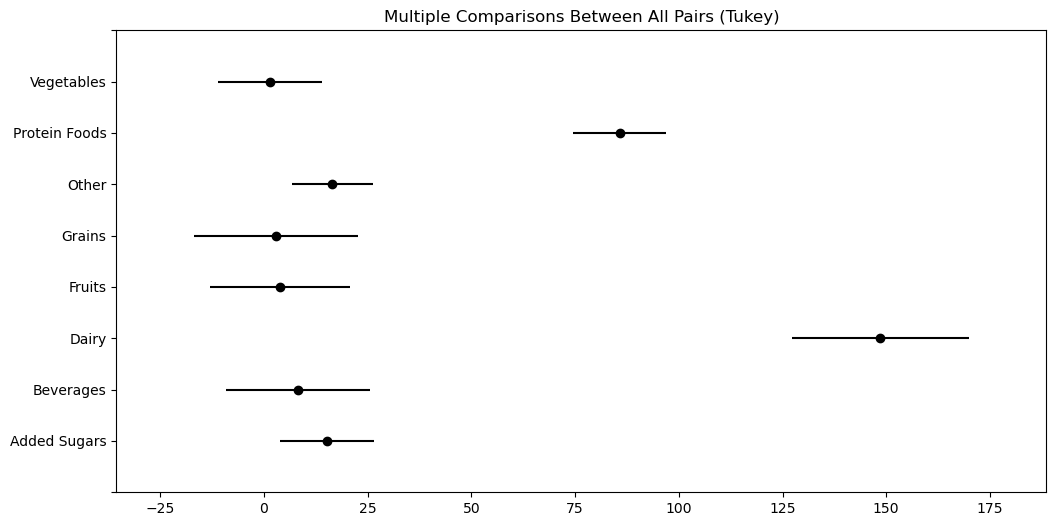

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1        group2     meandiff p-adj    lower      upper   reject
------------------------------------------------------------------------
 Added Sugars     Beverages  -264.843 0.8497  -832.5224  302.8364  False
 Added Sugars         Dairy   84.2856 0.9999  -567.0914  735.6626  False
 Added Sugars        Fruits -332.3622 0.6154  -890.8548  226.1304  False
 Added Sugars        Grains -268.5551 0.8932   -888.503  351.3928  False
 Added Sugars         Other  411.5343 0.0356    14.8784  808.1901   True
 Added Sugars Protein Foods  -54.3981 0.9999  -485.3201   376.524  False
 Added Sugars    Vegetables -288.0817 0.5625  -752.4713  176.3079  False
    Beverages         Dairy  349.1286 0.8481  -397.3649  1095.622  False
    Beverages        Fruits  -67.5193    1.0  -734.5083  599.4698  False
    Beverages        Grains   -3.7121    1.0  -722.9449  715.5207  False
    Beverages         Other  676.3772 0.0036   137.

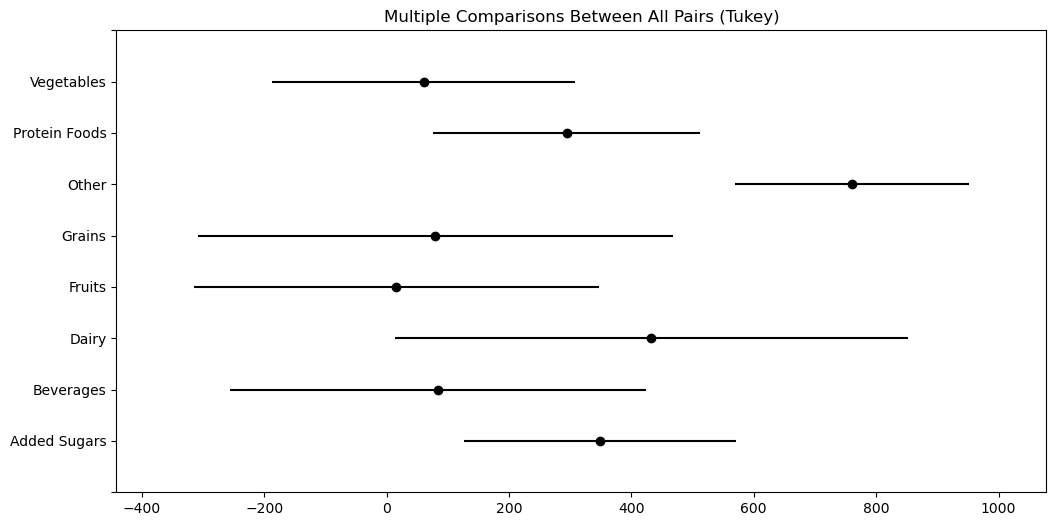

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Added Sugars     Beverages -27.2856    0.0 -37.2667 -17.3045   True
 Added Sugars         Dairy -27.3353    0.0 -38.7879 -15.8826   True
 Added Sugars        Fruits -22.9685    0.0 -32.7881 -13.1489   True
 Added Sugars        Grains -23.5746    0.0 -34.4746 -12.6745   True
 Added Sugars         Other -15.4774    0.0 -22.4515  -8.5033   True
 Added Sugars Protein Foods -44.3404    0.0 -51.9169 -36.7638   True
 Added Sugars    Vegetables  -14.686    0.0  -22.851   -6.521   True
    Beverages         Dairy  -0.0497    1.0 -13.1747  13.0754  False
    Beverages        Fruits   4.3171  0.953  -7.4101  16.0443  False
    Beverages        Grains    3.711 0.9869  -8.9347  16.3568  False
    Beverages         Other  11.8082  0.004    2.335  21.2813   True
    Beverages Protein Foods -17.05

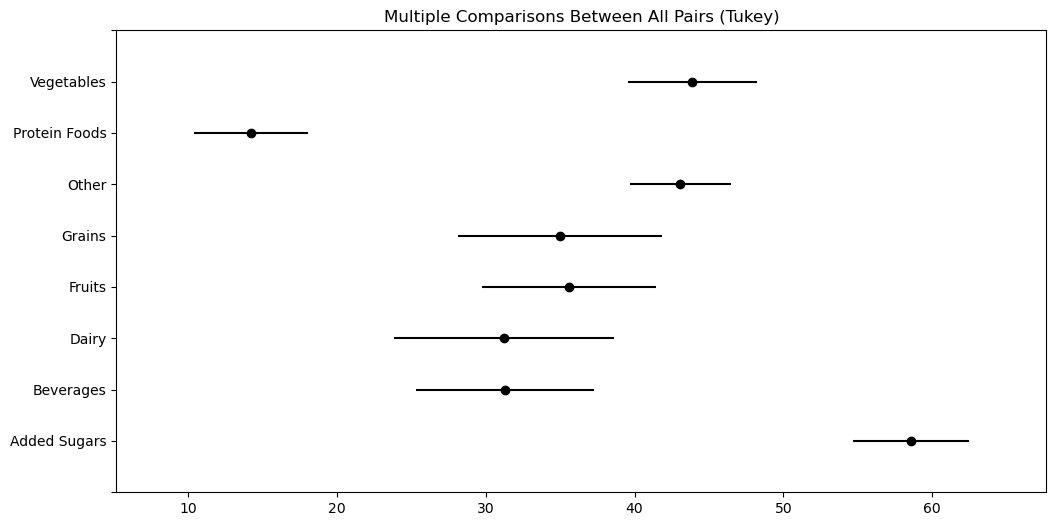

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Added Sugars     Beverages -15.5071    0.0 -22.7672   -8.247   True
 Added Sugars         Dairy -18.8226    0.0 -27.1531 -10.4921   True
 Added Sugars        Fruits    5.845 0.2029  -1.2976  12.9876  False
 Added Sugars        Grains  10.5756 0.0014    2.647  18.5041   True
 Added Sugars         Other  -0.8369 0.9997  -5.9097    4.236  False
 Added Sugars Protein Foods -13.8462    0.0 -19.3573  -8.3351   True
 Added Sugars    Vegetables   3.5653 0.6046  -2.3739   9.5044  False
    Beverages         Dairy  -3.3155 0.9657 -12.8624   6.2315  False
    Beverages        Fruits  21.3521    0.0  12.8219  29.8823   True
    Beverages        Grains  26.0826    0.0  16.8843   35.281   True
    Beverages         Other  14.6702    0.0   7.7795  21.5608   True
    Beverages Protein Foods   1.66

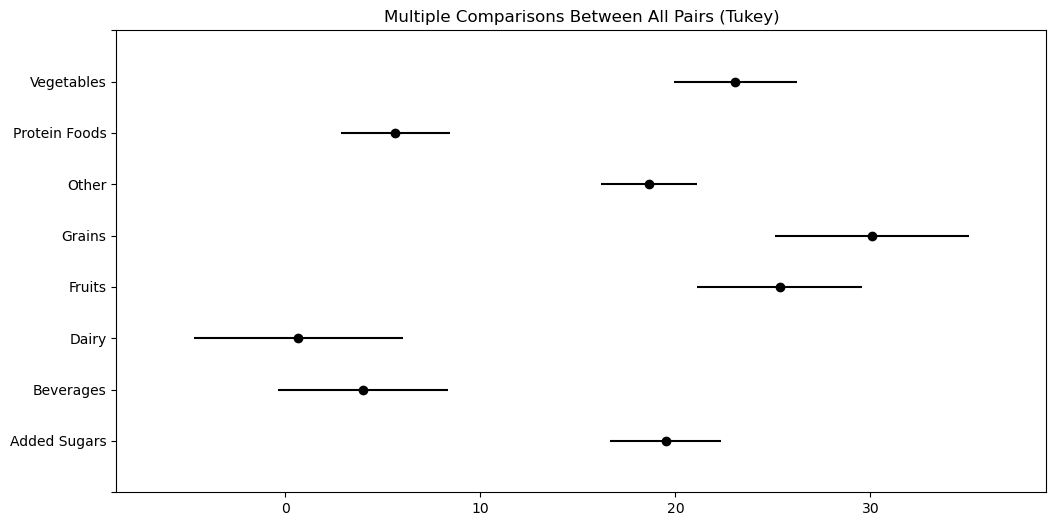

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Added Sugars     Beverages  -8.5231 0.0745 -17.4631   0.4169  False
 Added Sugars         Dairy  -6.7384 0.4859 -16.9965   3.5197  False
 Added Sugars        Fruits   1.9391 0.9977  -6.8563  10.7344  False
 Added Sugars        Grains  -14.282 0.0003 -24.0452  -4.5189   True
 Added Sugars         Other -12.8754    0.0 -19.1221  -6.6288   True
 Added Sugars Protein Foods -24.0077    0.0  -30.794 -17.2214   True
 Added Sugars    Vegetables -10.8889 0.0002 -18.2023  -3.5756   True
    Beverages         Dairy   1.7846 0.9998  -9.9714  13.5407  False
    Beverages        Fruits  10.4621 0.0518  -0.0418  20.9661  False
    Beverages        Grains  -5.7589 0.7834 -17.0857   5.5678  False
    Beverages         Other  -4.3524 0.7755 -12.8374   4.1327  False
    Beverages Protein Foods -15.48

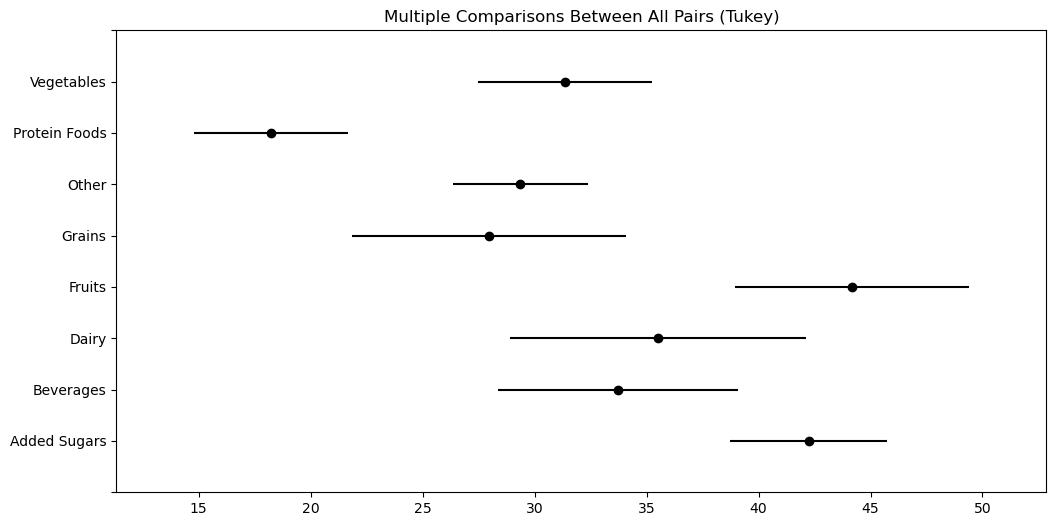

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1        group2    meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------
 Added Sugars     Beverages -24.0759    0.0 -33.9517 -14.2001   True
 Added Sugars         Dairy  -7.2598 0.5198 -18.5917   4.0721  False
 Added Sugars        Fruits  -1.4471 0.9998 -11.1631   8.2689  False
 Added Sugars        Grains   5.5605 0.7709  -5.2247  16.3456  False
 Added Sugars         Other  -7.8524 0.0132  -14.753  -0.9519   True
 Added Sugars Protein Foods -13.2854    0.0 -20.7821  -5.7888   True
 Added Sugars    Vegetables  -6.2236 0.2732 -14.3025   1.8553  False
    Beverages         Dairy  16.8161 0.0023   3.8295  29.8027   True
    Beverages        Fruits  22.6288    0.0  11.0253  34.2323   True
    Beverages        Grains  29.6364    0.0   17.124  42.1487   True
    Beverages         Other  16.2235    0.0   6.8503  25.5967   True
    Beverages Protein Foods  10.79

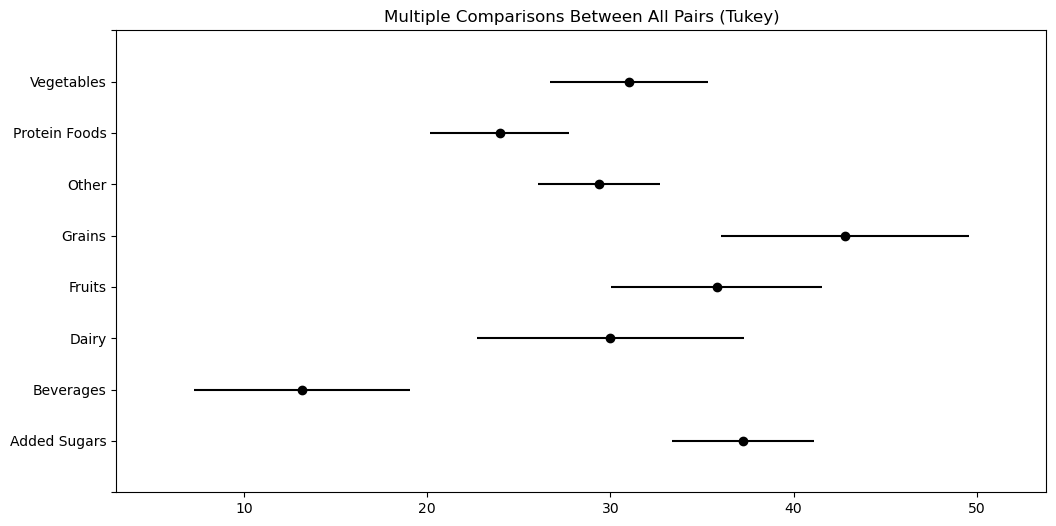

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
 Added Sugars     Beverages  -68.9596  0.409 -168.1992   30.2799  False
 Added Sugars         Dairy  265.5755    0.0  151.7043  379.4467   True
 Added Sugars        Fruits  -75.3602 0.2708 -172.9938   22.2733  False
 Added Sugars        Grains  -14.5117 0.9999 -122.8887   93.8652  False
 Added Sugars         Other   42.5973 0.5752  -26.7446  111.9391  False
 Added Sugars Protein Foods  -59.0719 0.2516  -134.404   16.2603  False
 Added Sugars    Vegetables  -33.5668 0.9147 -114.7496    47.616  False
    Beverages         Dairy  334.5351    0.0   204.036  465.0342   True
    Beverages        Fruits   -6.4006    1.0 -123.0011  110.1998  False
    Beverages        Grains   54.4479 0.8933  -71.2857  180.1814  False
    Beverages         Other  111.5569 0.0081   17.3674  205.7463

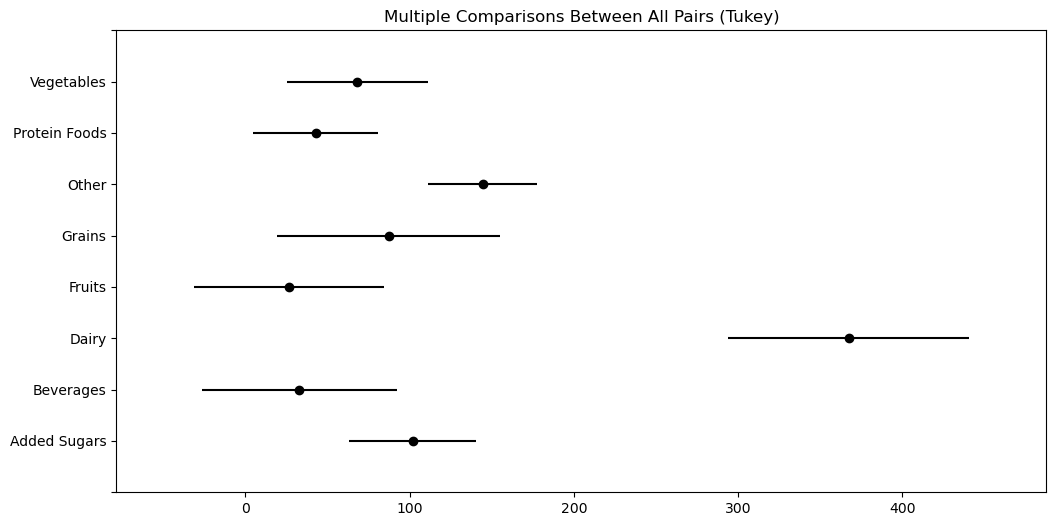

         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------
 Added Sugars     Beverages -176.1437 0.2657 -403.3968  51.1093  False
 Added Sugars         Dairy  -94.7665 0.9561 -355.5253 165.9923  False
 Added Sugars        Fruits   -31.838 0.9999 -255.4134 191.7374  False
 Added Sugars        Grains   63.3469 0.9943 -184.8303  311.524  False
 Added Sugars         Other   55.0777 0.9659 -103.7112 213.8667  False
 Added Sugars Protein Foods   73.2331  0.903  -99.2733 245.7395  False
 Added Sugars    Vegetables   78.3097 0.9066 -107.5945 264.2138  False
    Beverages         Dairy   81.3772 0.9916 -217.4585  380.213  False
    Beverages        Fruits  144.3057 0.7252 -122.7029 411.3144  False
    Beverages        Grains  239.4906 0.1856  -48.4322 527.4134  False
    Beverages         Other  231.2215 0.0257   15.5329 446.9101   True
    Be

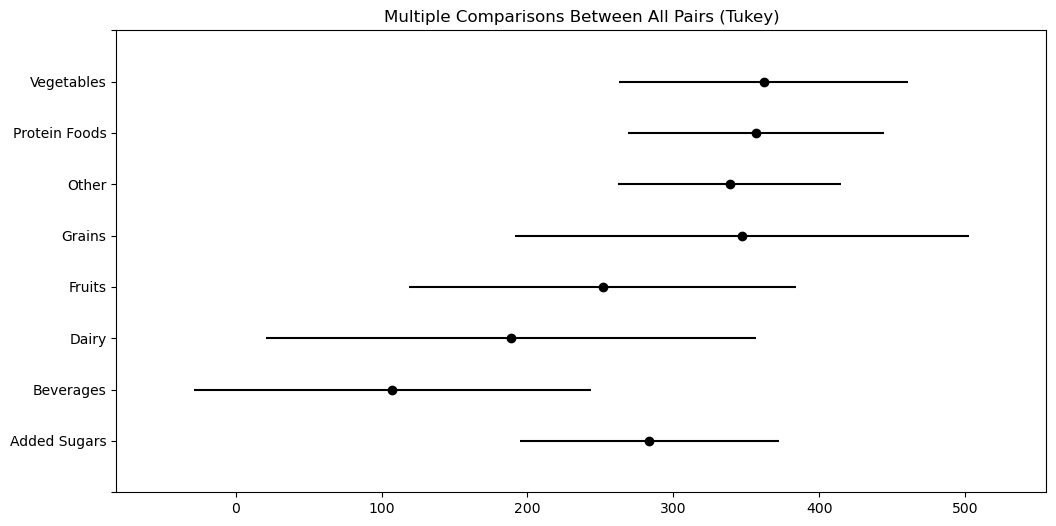

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1        group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------
 Added Sugars     Beverages -13.1243 0.0009 -22.7336  -3.515   True
 Added Sugars         Dairy  -2.5915 0.9966 -13.6176  8.4345  False
 Added Sugars        Fruits  -0.8502    1.0 -10.3039  8.6036  False
 Added Sugars        Grains   2.9226 0.9904  -7.5715 13.4166  False
 Added Sugars         Other   1.2463 0.9993   -5.468  7.9606  False
 Added Sugars Protein Foods   8.6356 0.0081   1.3412 15.9299   True
 Added Sugars    Vegetables   3.5359 0.8726  -4.3249 11.3968  False
    Beverages         Dairy  10.5328 0.1834  -2.1034 23.1689  False
    Beverages        Fruits  12.2741 0.0221   0.9838 23.5645   True
    Beverages        Grains  16.0469 0.0017   3.8722 28.2215   True
    Beverages         Other  14.3706 0.0001   5.2503 23.4909   True
    Beverages Protein Foods  21.7598    0.0  12.

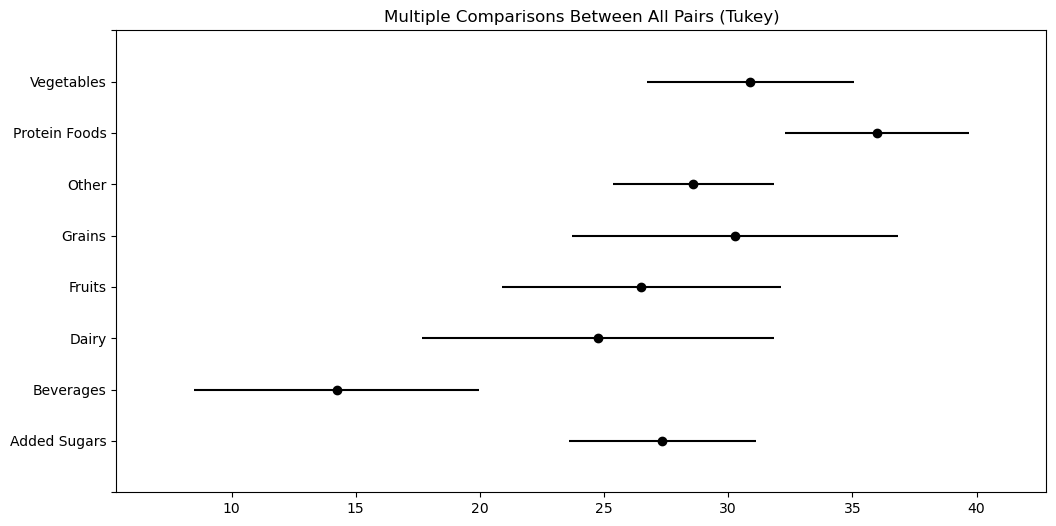

In [24]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# # Perform ANOVA (already assumed that you've checked this)
# model = sm.formula.ols('C(nutrient) ~ C(NIH_Food_Group)', data=nih_food_data).fit()
# anova_table = sm.stats.anova_lm(model, typ=2)

# print(anova_table)

# If ANOVA is significant, proceed with Tukey's HSD test for pairwise comparison
for nutrient in nutrients: 
    
    tukey = pairwise_tukeyhsd(endog=nih_food_data[nutrient],     # Dependent variable
                          groups=nih_food_data['NIH_Food_Group'],  # Independent variable (categorical)
                          alpha=0.05)  # Significance level

# Print the results
    print(tukey)

# Plot the results
    tukey.plot_simultaneous(figsize=(12, 6))
    plt.show()